# Importing files

In [24]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/global-youtube-statistics-2023/Global YouTube Statistics.csv


# Importing necessary libraries

In [25]:
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

reading the csv file and displaying it's few rows

In [26]:
df = pd.read_csv('/kaggle/input/global-youtube-statistics-2023/Global YouTube Statistics.csv',encoding="latin")
df.head()

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,...,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
0,1,T-Series,245000000,2.280000e+11,Music,T-Series,20082,India,IN,Music,...,2000000.0,2006.0,Mar,13.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
1,2,YouTube Movies,170000000,0.000000e+00,Film & Animation,youtubemovies,1,United States,US,Games,...,NaN,2006.0,Mar,5.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
2,3,MrBeast,166000000,2.836884e+10,Entertainment,MrBeast,741,United States,US,Entertainment,...,8000000.0,2012.0,Feb,20.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
3,4,Cocomelon - Nursery Rhymes,162000000,1.640000e+11,Education,Cocomelon - Nursery Rhymes,966,United States,US,Education,...,1000000.0,2006.0,Sep,1.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
4,5,SET India,159000000,1.480000e+11,Shows,SET India,116536,India,IN,Entertainment,...,1000000.0,2006.0,Sep,20.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880


# Cleaning data

In [27]:
df.columns

Index(['rank', 'Youtuber', 'subscribers', 'video views', 'category', 'Title',
       'uploads', 'Country', 'Abbreviation', 'channel_type',
       'video_views_rank', 'country_rank', 'channel_type_rank',
       'video_views_for_the_last_30_days', 'lowest_monthly_earnings',
       'highest_monthly_earnings', 'lowest_yearly_earnings',
       'highest_yearly_earnings', 'subscribers_for_last_30_days',
       'created_year', 'created_month', 'created_date',
       'Gross tertiary education enrollment (%)', 'Population',
       'Unemployment rate', 'Urban_population', 'Latitude', 'Longitude'],
      dtype='object')

In [28]:
df.shape

(995, 28)

In [29]:
df.isnull().sum()

rank                                         0
Youtuber                                     0
subscribers                                  0
video views                                  0
category                                    46
Title                                        0
uploads                                      0
Country                                    122
Abbreviation                               122
channel_type                                30
video_views_rank                             1
country_rank                               116
channel_type_rank                           33
video_views_for_the_last_30_days            56
lowest_monthly_earnings                      0
highest_monthly_earnings                     0
lowest_yearly_earnings                       0
highest_yearly_earnings                      0
subscribers_for_last_30_days               337
created_year                                 5
created_month                                5
created_date 

In [30]:
df= df.dropna()

In [31]:
df.shape

(554, 28)

In [32]:
numerical_cols = ['subscribers', 'video views', 'uploads', 
                  'lowest_monthly_earnings', 'highest_monthly_earnings', 
                  'lowest_yearly_earnings', 'highest_yearly_earnings',
                  'video_views_for_the_last_30_days', 'subscribers_for_last_30_days',
                  'Gross tertiary education enrollment (%)', 'Population','Unemployment rate',
                  'Urban_population']
plt.style.use("seaborn")
plt.rcParams['figure.figsize'] = (16, 8)



new_matrix=df[numerical_cols].corr()
new_matrix.head()

/tmp/ipykernel_36/3017996512.py:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


,subscribers,video views,uploads,lowest_monthly_earnings,highest_monthly_earnings,lowest_yearly_earnings,highest_yearly_earnings,video_views_for_the_last_30_days,subscribers_for_last_30_days,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population
subscribers,1.000000,0.850776,0.074791,0.534713,0.534388,0.534883,0.534721,0.321182,0.361800,-0.009225,0.092695,-0.002915,0.094672
video views,0.850776,1.000000,0.147477,0.637991,0.637376,0.638861,0.638019,0.360970,0.203693,-0.024397,0.077511,-0.010848,0.071165
uploads,0.074791,0.147477,1.000000,0.155557,0.156062,0.156639,0.155540,0.079308,0.009067,-0.249164,0.129280,-0.224230,0.056912
lowest_monthly_earnings,0.534713,0.637991,0.155557,1.000000,0.999937,0.999914,0.999998,0.585838,0.616795,-0.045115,0.103193,-0.012994,0.096837
highest_monthly_earnings,0.534388,0.637376,0.156062,0.999937,1.000000,0.999832,0.999935,0.585788,0.617150,-0.044515,0.103213,-0.012512,0.096994


# Data Analysis and Visualisation

/tmp/ipykernel_36/4257496125.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


<Axes: title={'center': 'Correlation Heatmap'}>

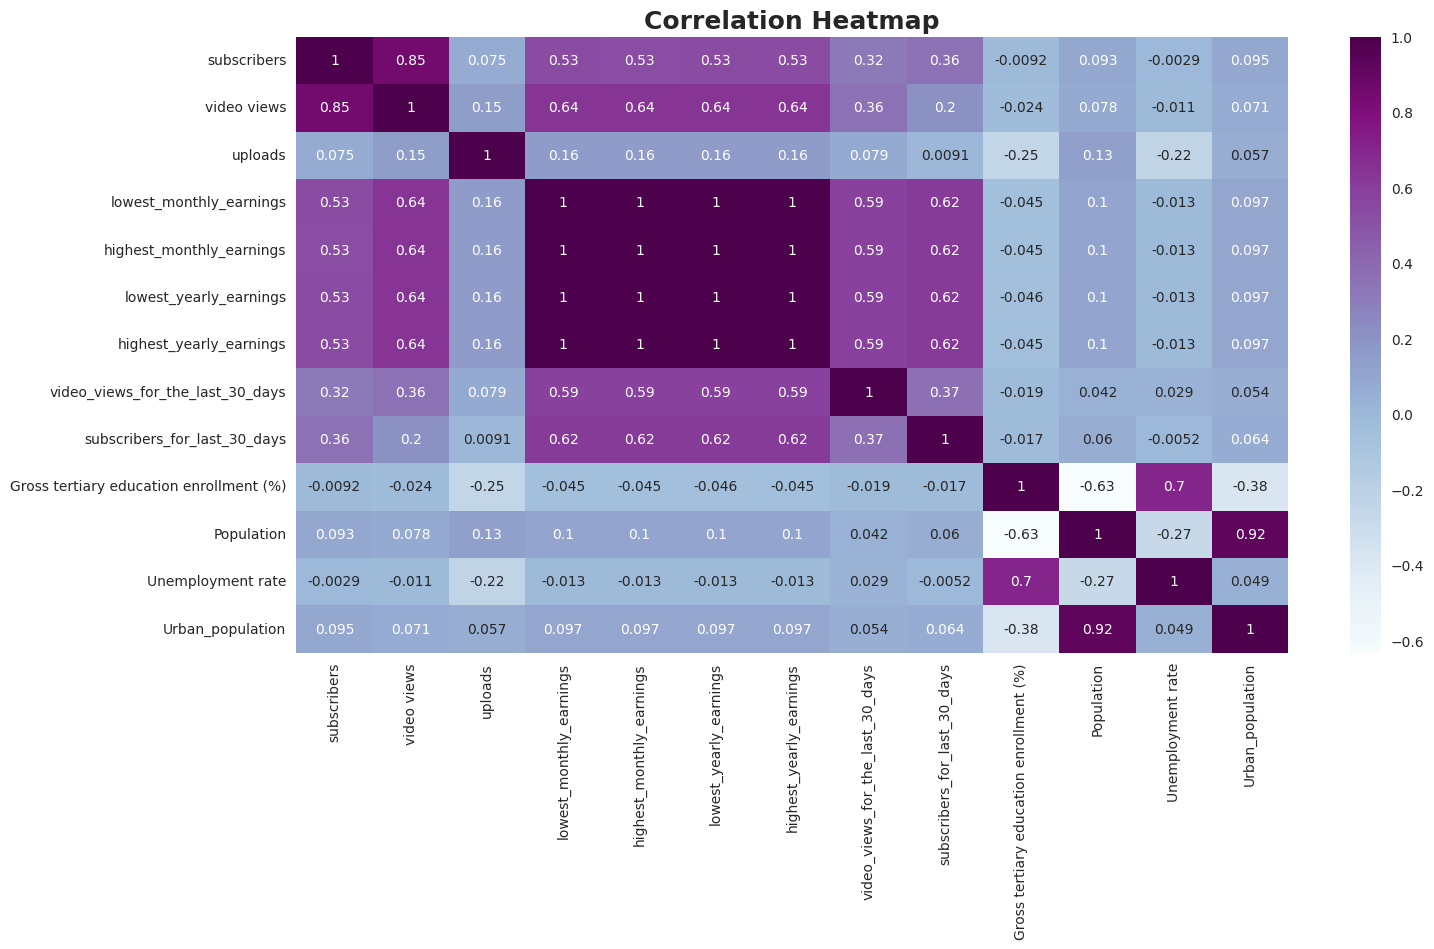

In [33]:
plt.style.use("seaborn")
plt.rcParams['figure.figsize'] = (16, 8)

plt.title("Correlation Heatmap", fontsize=18, weight='bold')
sns.heatmap(new_matrix, annot=True, cmap="BuPu")

Interpretation
* **Subscribers & Video Views:** There is a very strong postitive correlation between these two variables. It demonstrates that channels with more/less number of Subscribers, have more/less Viedo Views

* **Video Views & Earnings::** There is a moderate positive correlation between Video Views and all four columns of Earnings(H/L monthly and H/L yearly). It means that more/less Video Views has a direct effect on more/less Earnings.

* **video_views_for_the_last_30_days & Earnings:** There is a positive correlation between video_views_for_the_last_30_days and all four columns of Earnings(H/L monthly and H/L yearly).

* **Population & subscribers / Video Views:** There is a very weak positive correlation between these two. It demonestrates that more/less population of the country that the Youtube channel is based in, does not effect subscribers or Video Views greatly. (It can be interpreted that, in real life because of the world-wide connection on Internet, the local factors such as country's popullation does not effect channels success on YouTube)

* **Uploads & subscribers / Video Views / Earning:** There is a weak possitive correlation between number of uploads and subscribers / Video Views / Earning. Which means uploading more videos on Youtube does not guarantee the success of a Channel.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='subscribers', ylabel='Count'>

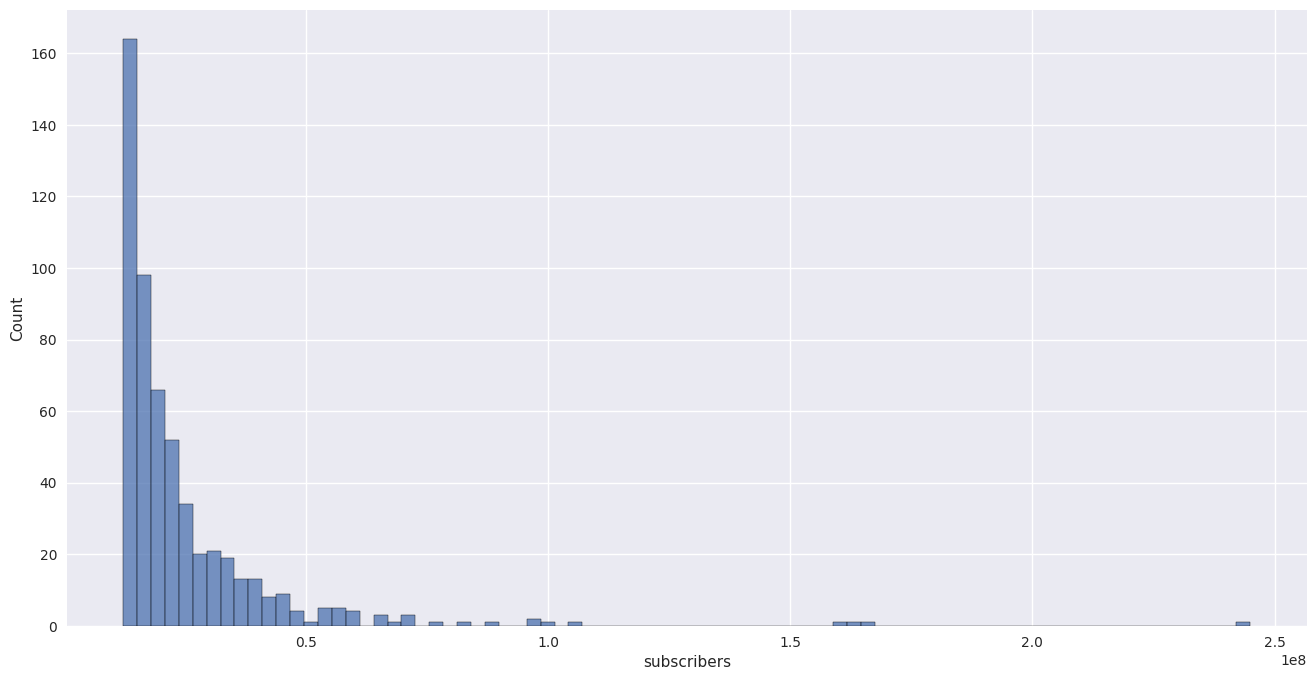

In [34]:
sns.histplot(df['subscribers'])

<Axes: xlabel='subscribers', ylabel='video views'>

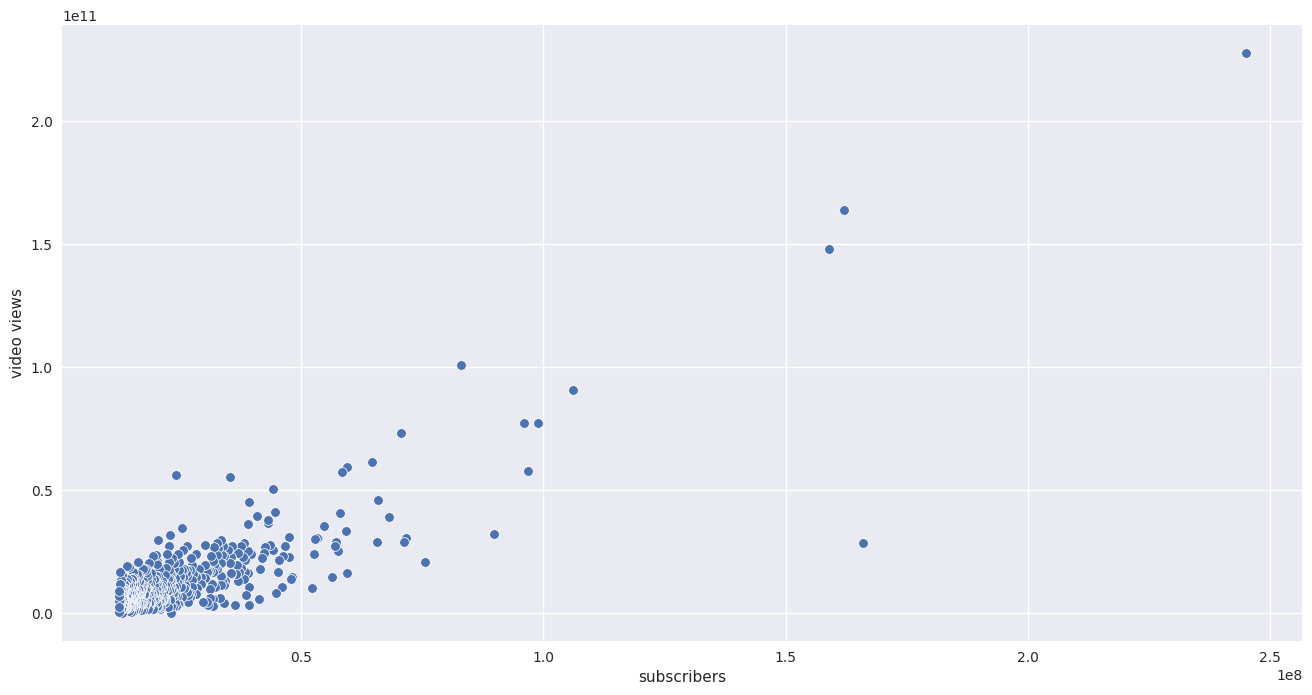

In [35]:
sns.scatterplot(data=df,x='subscribers',y="video views")

In [36]:
zero_views_index= (df[df['video views']==0]).index
print(zero_views_index)

Index([], dtype='int64')


In [37]:
df.head()

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,...,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
0,1,T-Series,245000000,2.280000e+11,Music,T-Series,20082,India,IN,Music,...,2000000.0,2006.0,Mar,13.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
2,3,MrBeast,166000000,2.836884e+10,Entertainment,MrBeast,741,United States,US,Entertainment,...,8000000.0,2012.0,Feb,20.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
3,4,Cocomelon - Nursery Rhymes,162000000,1.640000e+11,Education,Cocomelon - Nursery Rhymes,966,United States,US,Education,...,1000000.0,2006.0,Sep,1.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
4,5,SET India,159000000,1.480000e+11,Shows,SET India,116536,India,IN,Entertainment,...,1000000.0,2006.0,Sep,20.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
8,9,Like Nastya,106000000,9.047906e+10,People & Blogs,Like Nastya Vlog,493,Russia,RU,People,...,100000.0,2016.0,Jan,14.0,81.9,1.443735e+08,4.59,107683889.0,61.524010,105.318756


In [38]:
channels_in_year= pd.DataFrame(df['created_year'].value_counts() ) #first make a DataFrame. 
channels_in_year= channels_in_year.reset_index() #reset the index
channels_in_year.columns = ['Year', 'Created Channels'] #define columns' names
channels_in_year= channels_in_year.sort_values(by = 'Year', ascending = True)
channels_in_year= channels_in_year.drop(axis= 0, index=[17])
channels_in_year= channels_in_year.reset_index()
channels_in_year


,index,Year,Created Channels
0,14,2005.0,14
1,5,2006.0,44
2,10,2007.0,28
3,9,2008.0,29
4,8,2009.0,30
5,11,2010.0,19
6,1,2011.0,48
7,6,2012.0,41
8,3,2013.0,47
9,0,2014.0,66


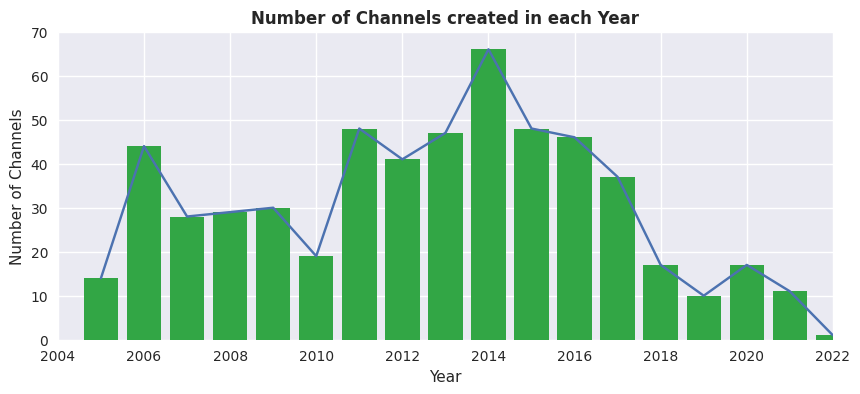

In [39]:
x= channels_in_year['Year']
y= channels_in_year['Created Channels']
 

fig = plt.figure(figsize =(10, 4))
 

plt.bar(x, y, color = '#32A645')


plt.ylim(0,70)
plt.xlim(2004,2022)

plt.xlabel("Year")
plt.ylabel("Number of Channels")
plt.title("Number of Channels created in each Year",  weight = 'bold')


plt.plot(x,y) 

**Observation**

The bar chart illustrates number of channels created in each year from 2005 to 2022. Here are some highlights

    1. Quite a sharp increase in 2006 followed by a significant decrease in the next year
    2. More stablized period from 2007 to 2010
    3. Another dramatic increase in 2011 followed by a drop in the next year
    4. It is intresting to note that the year 2014 is the Peak of the chart
    5. In the next eight years (2015-2022), the rate of new Channels has gradually decrease and reached the lowest rate in 2022.

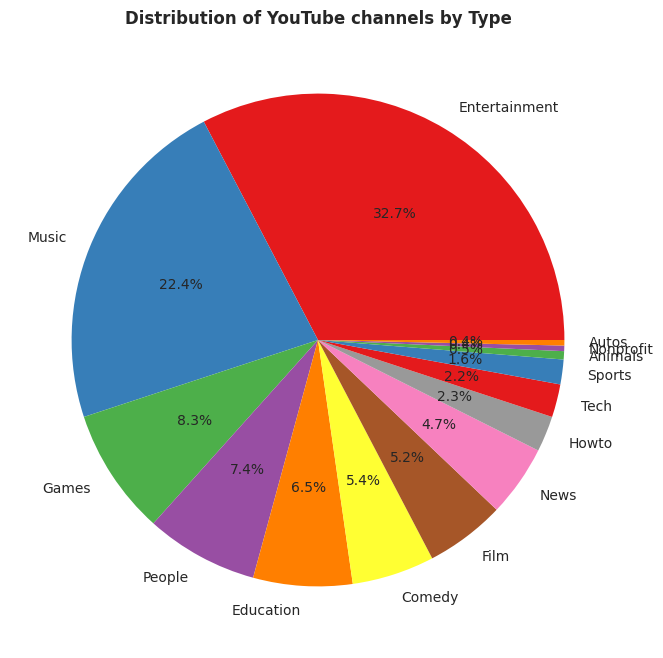

In [40]:
channel_types = df['channel_type'].value_counts()
plt.pie(channel_types,colors=sns.color_palette('Set1'),
        labels= channel_types.index, autopct='%1.1f%%') 
plt.title('Distribution of YouTube channels by Type', weight = 'bold')
plt.show() 

# Observation
* From the pie chart it is clear that YouTube users predominantly attend the platform for Entertainment purposes.
* In broader sense, to interpret more precisely, we can call 'Entertainment, Music, Games, Comedy, Film' as all-Entertainments. and 'Education, Howto' as all-Educations
* all-Entertainmnets forms the major chunk of the pie chart
* all-Educations stands as minor chunk of the pie chart

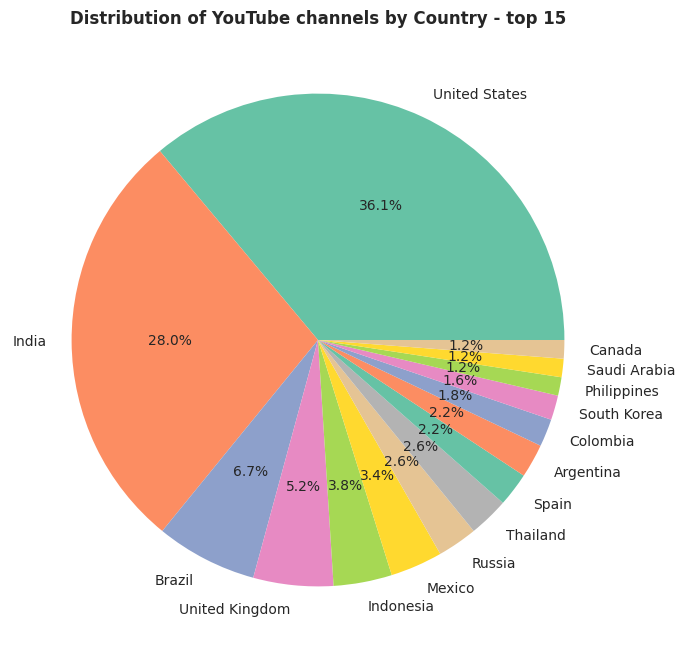

In [41]:
channel_orig = df['Country'].value_counts().head(15)
plt.pie(channel_orig, labels= channel_orig.index, autopct='%1.1f%%', colors=sns.color_palette('Set2'))
plt.title('Distribution of YouTube channels by Country - top 15', weight = 'bold')
plt.show() 

**Observation**
From the pie chart it is clear that

* United States has the highest number of YouTubers
* India is in second place by a considerable margin
* Due to the fact that Unknown countries are ranked third, it seems that they have overshadowed the results of the survey.

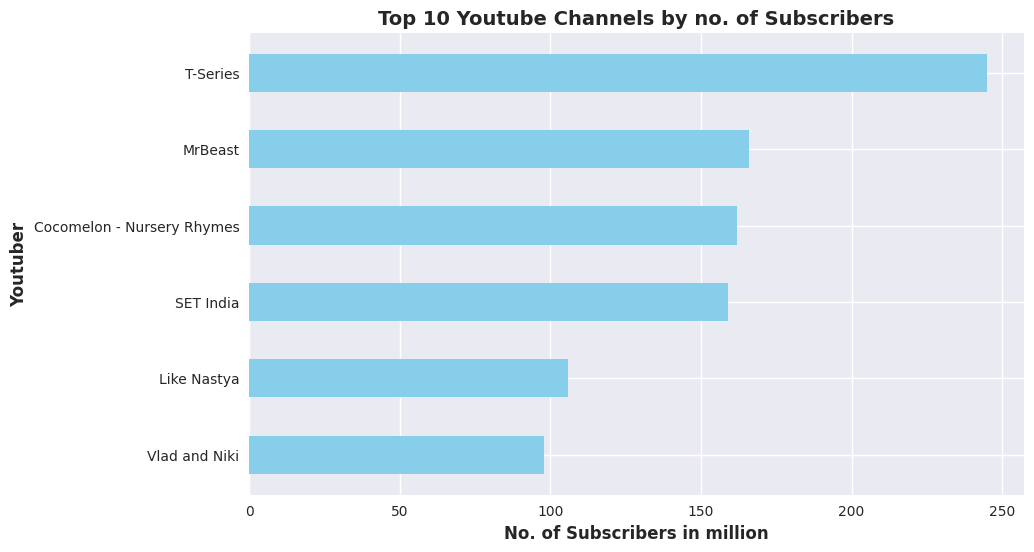

In [42]:

bar_colms= df.loc[0:9,['Youtuber', 'subscribers']].sort_values('subscribers', ascending = True)

bar_colms['subscribers (MM)'] = (bar_colms['subscribers'] / 1000000).astype(int)

bar_colms


x= bar_colms['Youtuber']
y= bar_colms['subscribers (MM)']

fig = plt.figure(figsize =(10, 6))

plt.barh(x, y, color= 'skyblue', height= 0.5 )
 
plt.xlabel("No. of Subscribers in million", weight='bold', fontsize = 12)
plt.ylabel("Youtuber", weight='bold', fontsize = 12)
plt.title("Top 10 Youtube Channels by no. of Subscribers", weight='bold', fontsize = 14)
plt.show()

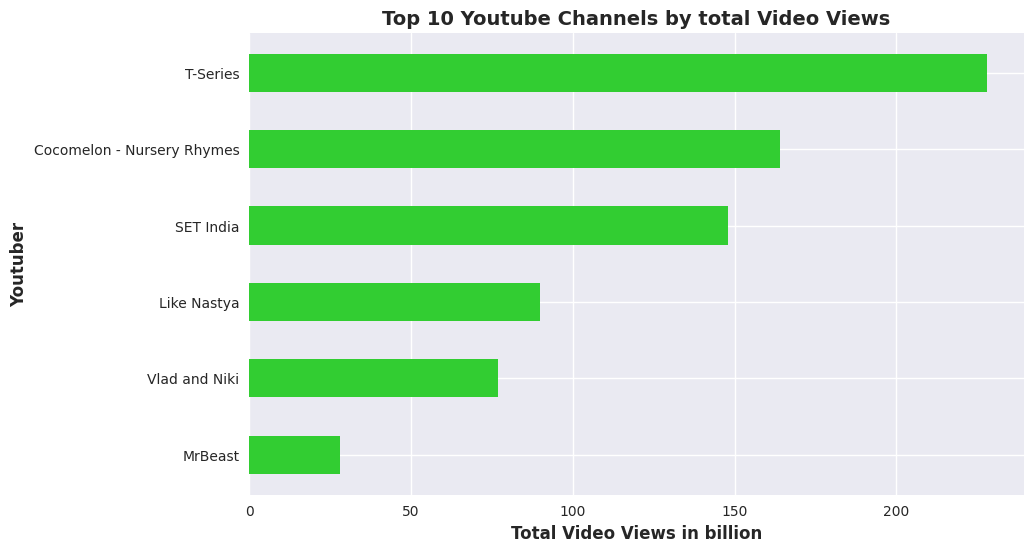

In [43]:
bar_colms= df.loc[0:9,['Youtuber', 'video views']].sort_values('video views', ascending = True)


bar_colms['video views (bil)'] = (bar_colms['video views'] / 1000000000).astype(int)

x= bar_colms['Youtuber']
y= bar_colms['video views (bil)']

fig = plt.figure(figsize =(10, 6))
 

plt.barh(x, y, color= 'limegreen', height= 0.5 )
 
plt.xlabel("Total Video Views in billion", weight='bold', fontsize = 12)
plt.ylabel("Youtuber", weight='bold', fontsize = 12)
plt.title("Top 10 Youtube Channels by total Video Views", weight='bold', fontsize = 14)
plt.show()

<Axes: xlabel='video views', ylabel='highest_yearly_earnings'>

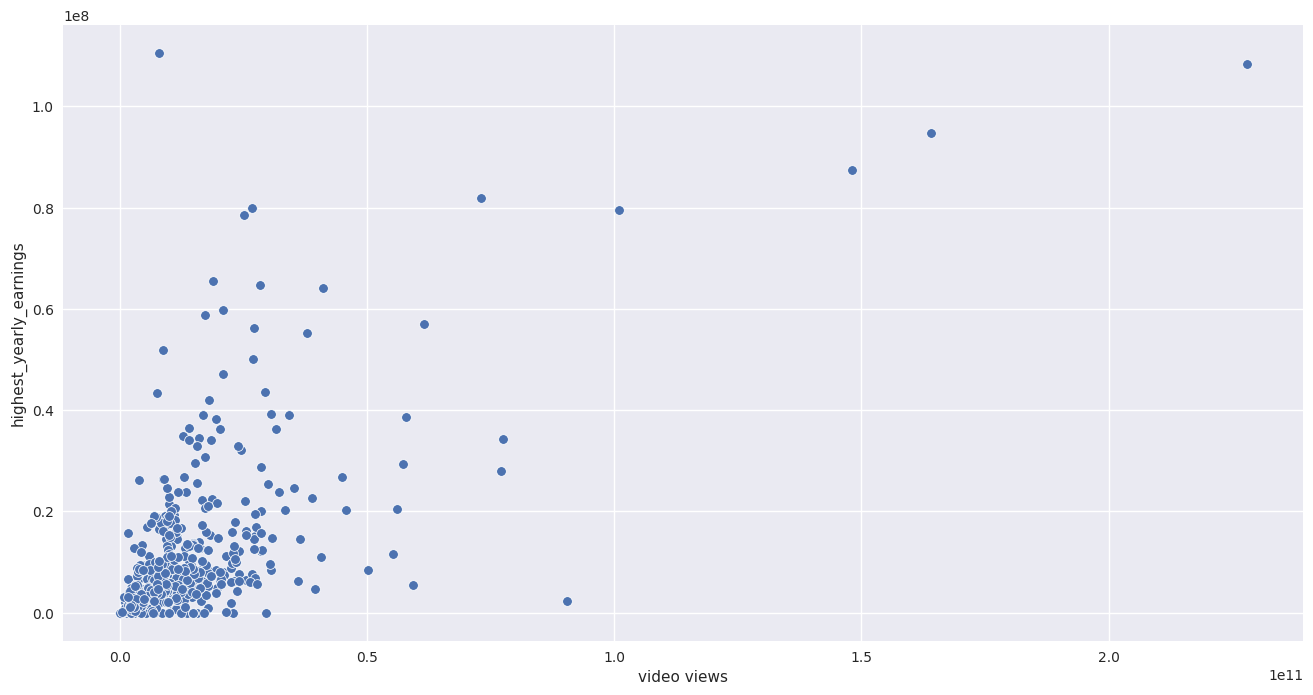

In [44]:
sns.scatterplot(data=df,x='video views',y='highest_yearly_earnings')

<Axes: xlabel='uploads', ylabel='video views'>

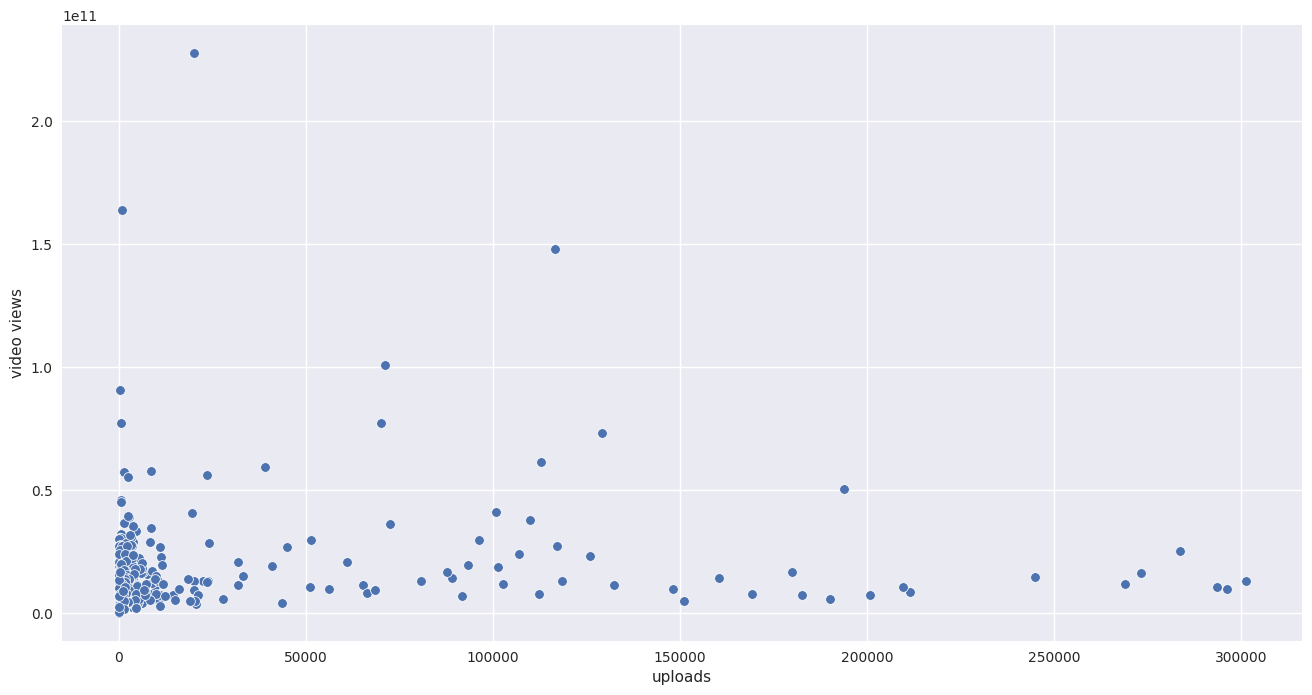

In [45]:
sns.scatterplot(data=df,x='uploads',y='video views')

**Observation**
This scatter make it clear that higher total Video View does not guarantee higher income. We can list several possible reasons:

* The lenght of videos has an impact on earning
* It is crucial to enable Ads on videos

# Conclusion

1. 2006, 2011, 2014 are shown to be the years in which higher number of YouTube Channels were created.
2. From 2018 to the last year of this survey (2022), the number of channels created has decreased drastically.
3. There is strong positive correlation between Subscribers and Video Views
4. There is a moderate positive correlation between Video Views and all four columns of Earnings(H/L monthly and H/L yearly)
5. There is a weak possitive correlation between number of uploads and subscribers / Video Views / Earning
6. YouTube users predominantly attend the platform for Entertainment purposes
7. Educational Categories (e.g. Education, HowTo) stand in minority of users' motivations
8. United States has the highest number of YouTubers and India stands in the second place
9. Higher total Video View does not guarantee higher income